MACHINE LEARNING ALGORITHMS

1. LINEAR REGRESSION

Example Data set : Super Market Sales

1. import necessary libraries

In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [3]:
df = pd.read_csv("/kaggle/input/supermarketsales/superstore_sales.csv")

In [4]:
df

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
0,3,13-10-2010,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010
1,293,01-10-2012,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.58,02-10-2012
2,293,01-10-2012,High,27,244.57,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012
3,483,10-07-2011,High,30,4965.76,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,0.58,12-07-2011
4,515,28-08-2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,55558,09-08-2010,Medium,8,1294.04,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,0.65,09-08-2010
8395,55558,09-08-2010,Medium,23,392.57,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,0.38,11-08-2010
8396,56550,08-04-2011,Not Specified,37,823.78,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,0.41,10-04-2011
8397,56550,08-04-2011,Not Specified,8,469.84,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,0.56,09-04-2011


In [5]:
df.shape

(8399, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8399 non-null   int64  
 1   Order Date            8399 non-null   object 
 2   Order Priority        8399 non-null   object 
 3   Order Quantity        8399 non-null   int64  
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Ship Mode             8399 non-null   object 
 7   Profit                8399 non-null   float64
 8   Unit Price            8399 non-null   float64
 9   Shipping Cost         8399 non-null   float64
 10  Customer Name         8399 non-null   object 
 11  Province              8399 non-null   object 
 12  Region                8399 non-null   object 
 13  Customer Segment      8399 non-null   object 
 14  Product Category      8399 non-null   object 
 15  Product Sub-Category 

In [7]:
df.describe()

,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00,8336.00
mean,29965.18,25.57,1775.88,0.05,181.18,89.35,12.84,0.51
std,17260.88,14.48,3585.05,0.03,1196.65,290.35,17.26,0.14
min,3.00,1.00,2.24,0.00,-14140.70,0.99,0.49,0.35
25%,15011.50,13.00,143.19,0.02,-83.31,6.48,3.30,0.38
50%,29857.00,26.00,449.42,0.05,-1.50,20.99,6.07,0.52
75%,44596.00,38.00,1709.32,0.08,162.75,85.99,13.99,0.59
max,59973.00,50.00,89061.05,0.25,27220.69,6783.02,164.73,0.85


In [8]:
df.isnull().sum()

Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Base Margin     63
Ship Date                0
dtype: int64

In [9]:
df['Product Base Margin'].isna().sum()

63

In [10]:
df['Product Base Margin'].head(20)

0    0.80
1    0.58
2    0.39
3    0.58
4    0.50
5    0.37
6    0.38
7     NaN
8     NaN
9    0.38
10   0.40
11   0.53
12   0.50
13   0.71
14   0.37
15   0.53
16   0.40
17   0.60
18   0.68
19   0.59
Name: Product Base Margin, dtype: float64

In [11]:
df['Product Base Margin'] = df['Product Base Margin'].fillna(0)

In [12]:
df['Product Base Margin'].head(10)

0   0.80
1   0.58
2   0.39
3   0.58
4   0.50
5   0.37
6   0.38
7   0.00
8   0.00
9   0.38
Name: Product Base Margin, dtype: float64

In [13]:
df.describe()

,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00,8399.00
mean,29965.18,25.57,1775.88,0.05,181.18,89.35,12.84,0.51
std,17260.88,14.48,3585.05,0.03,1196.65,290.35,17.26,0.14
min,3.00,1.00,2.24,0.00,-14140.70,0.99,0.49,0.00
25%,15011.50,13.00,143.19,0.02,-83.31,6.48,3.30,0.38
50%,29857.00,26.00,449.42,0.05,-1.50,20.99,6.07,0.52
75%,44596.00,38.00,1709.32,0.08,162.75,85.99,13.99,0.59
max,59973.00,50.00,89061.05,0.25,27220.69,6783.02,164.73,0.85


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8399 non-null   int64  
 1   Order Date            8399 non-null   object 
 2   Order Priority        8399 non-null   object 
 3   Order Quantity        8399 non-null   int64  
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Ship Mode             8399 non-null   object 
 7   Profit                8399 non-null   float64
 8   Unit Price            8399 non-null   float64
 9   Shipping Cost         8399 non-null   float64
 10  Customer Name         8399 non-null   object 
 11  Province              8399 non-null   object 
 12  Region                8399 non-null   object 
 13  Customer Segment      8399 non-null   object 
 14  Product Category      8399 non-null   object 
 15  Product Sub-Category 

In [15]:
df

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
0,3,13-10-2010,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010
1,293,01-10-2012,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.58,02-10-2012
2,293,01-10-2012,High,27,244.57,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012
3,483,10-07-2011,High,30,4965.76,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,0.58,12-07-2011
4,515,28-08-2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,55558,09-08-2010,Medium,8,1294.04,0.05,Delivery Truck,-323.18,150.98,66.27,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,0.65,09-08-2010
8395,55558,09-08-2010,Medium,23,392.57,0.04,Regular Air,22.25,17.07,8.13,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,0.38,11-08-2010
8396,56550,08-04-2011,Not Specified,37,823.78,0.03,Express Air,343.05,22.23,5.08,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,0.41,10-04-2011
8397,56550,08-04-2011,Not Specified,8,469.84,0.00,Regular Air,-159.24,65.99,8.99,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,0.56,09-04-2011


 **Sales and Profit Analysis**
1. What is the total sales, profit, and shipping cost across the dataset?


In [16]:
Total_sales, Total_Profit, Total_shipping_cost = df[['Sales', 'Profit', 'Shipping Cost']].sum()

In [17]:
print("Total sales:", round(Total_sales,2))
print("Total profit:", round(Total_Profit,2))
print("Total Shipping cost:", round(Total_shipping_cost,2))

Total sales: 14915600.82
Total profit: 1521767.98
Total Shipping cost: 107831.04


2. Which provinces contribute the most and least to overall sales?

In [18]:
province = df.groupby('Province')['Sales'].sum()
round(province,2)

Province
Alberta                 1704791.49
British Columbia        1892757.78
Manitoba                1372848.78
New Brunswick            684211.52
Newfoundland             102924.07
Northwest Territories    800847.33
Nova Scotia              817729.36
Nunavut                  116376.48
Ontario                 3063212.48
Prince Edward Island     409383.25
Quebec                  1510195.08
Saskachewan             1464455.82
Yukon                    975867.37
Name: Sales, dtype: float64

In [19]:
most_contributed_province = province.idxmax()

In [20]:
most_contributed_province

'Ontario'

In [21]:
least_contributed_province = province.idxmin()

In [22]:
least_contributed_province

'Newfoundland'

In [23]:
print(f"Most_contributed Province overall to sales: { most_contributed_province}")

Most_contributed Province overall to sales: Ontario


In [24]:
print(f"Least_contributed Province overall to sales: { least_contributed_province}")

Least_contributed Province overall to sales: Newfoundland


3. What is the average profit margin (Profit/Sales) for each region?

In [25]:
df['Profit Margin'] = df['Profit'] / df['Sales']

In [26]:
df['Profit Margin']

0      -0.82
1       0.05
2       0.19
3       0.24
4       0.08
        ... 
8394   -0.25
8395    0.06
8396    0.42
8397   -0.34
8398    0.29
Name: Profit Margin, Length: 8399, dtype: float64

In [27]:
region  = df.groupby('Region')['Profit Margin'].mean()

In [28]:
region

Region
Atlantic                -0.12
Northwest Territories   -0.12
Nunavut                 -0.14
Ontario                 -0.13
Prarie                  -0.12
Quebec                  -0.14
West                    -0.14
Yukon                   -0.17
Name: Profit Margin, dtype: float64

4. Are there specific product categories or subcategories that consistently yield high profits?

In [29]:
products = df.groupby('Product Category')['Profit'].sum().sort_values(ascending = False)

In [30]:
products

Product Category
Technology        886313.52
Office Supplies   518021.43
Furniture         117433.03
Name: Profit, dtype: float64

In [31]:
products_sub_category = df.groupby('Product Sub-Category')['Profit'].sum().sort_values(ascending = False)

In [32]:
products_sub_category

Product Sub-Category
Telephones and Communication     316951.62
Office Machines                  307712.93
Binders and Binder Accessories   307413.39
Copiers and Fax                  167361.49
Chairs & Chairmats               149649.73
Office Furnishings               100427.93
Appliances                        97158.06
Computer Peripherals              94287.48
Envelopes                         48182.60
Paper                             45263.20
Labels                            13677.17
Pens & Art Supplies                7564.78
Storage & Organization             6664.15
Rubber Bands                       -102.67
Scissors, Rulers and Trimmers     -7799.25
Bookcases                        -33582.13
Tables                           -99062.50
Name: Profit, dtype: float64

5. Is there any correlation between discount percentage and profit?

In [33]:
correlation = df['Discount'].corr(df['Profit'])

In [34]:
print(f"The correlation between discount and profit: {correlation}")

The correlation between discount and profit: -0.037128373576373545


<Axes: xlabel='Discount', ylabel='Profit'>

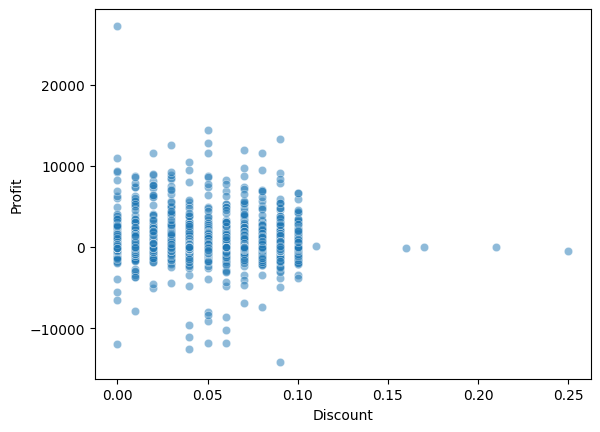

In [35]:
sns.scatterplot(data = df, x='Discount', y='Profit', alpha = 0.5)

6. What is the average order quantity across all orders?


In [36]:
order_quantity  = df.groupby('Product Category')['Order Quantity'].mean()

In [37]:
order_quantity

Product Category
Furniture         25.71
Office Supplies   25.66
Technology        25.27
Name: Order Quantity, dtype: float64

In [38]:
order_sub_quantity  = df.groupby('Product Sub-Category')['Order Quantity'].mean()

In [39]:
order_sub_quantity

Product Sub-Category
Appliances                       25.12
Binders and Binder Accessories   25.13
Bookcases                        25.88
Chairs & Chairmats               24.84
Computer Peripherals             25.36
Copiers and Fax                  24.46
Envelopes                        26.74
Labels                           25.35
Office Furnishings               26.20
Office Machines                  23.31
Paper                            25.20
Pens & Art Supplies              26.82
Rubber Bands                     27.49
Scissors, Rulers and Trimmers    27.30
Storage & Organization           25.28
Tables                           25.47
Telephones and Communication     26.01
Name: Order Quantity, dtype: float64

In [40]:
order_quantity_overall = df['Order Quantity'].mean()

In [41]:
order_quantity_overall

25.571734730325037

7. How does customer segment affect sales and profitability?


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order ID              8399 non-null   int64  
 1   Order Date            8399 non-null   object 
 2   Order Priority        8399 non-null   object 
 3   Order Quantity        8399 non-null   int64  
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Ship Mode             8399 non-null   object 
 7   Profit                8399 non-null   float64
 8   Unit Price            8399 non-null   float64
 9   Shipping Cost         8399 non-null   float64
 10  Customer Name         8399 non-null   object 
 11  Province              8399 non-null   object 
 12  Region                8399 non-null   object 
 13  Customer Segment      8399 non-null   object 
 14  Product Category      8399 non-null   object 
 15  Product Sub-Category 

In [43]:
customer_segment = df.groupby('Customer Segment').agg(
total_sales =  ('Sales', 'sum'),
total_profit = ('Profit', 'sum'),
Average_sales = ('Sales', 'mean'),
Average_profit = ('Profit', 'mean')
).sort_values(by = 'total_sales', ascending = False)

In [44]:
round(customer_segment,2)

,total_sales,total_profit,Average_sales,Average_profit
Customer Segment,,,,
Corporate,5498904.88,599746.00,1787.68,194.98
Home Office,3564763.88,318354.03,1754.31,156.67
Consumer,3063611.08,287959.94,1857.86,174.63
Small Business,2788320.99,315708.01,1698.12,192.27


8. Which customer segment has the highest average order quantity?

In [45]:
highest_order_quantity = df.groupby('Customer Segment')['Order Quantity'].mean().sort_values(ascending = False)

In [46]:
highest_order_quantity = highest_order_quantity.idxmax()

In [47]:
highest_order_quantity

'Home Office'

9. What is the distribution of order priorities, and how do they affect shipping cost or profit?

In [48]:
distribution_of_order_priorities = df.groupby('Order Priority')[['Shipping Cost', 'Profit']].agg(['sum', 'mean'])

In [49]:
distribution_of_order_priorities

Shipping Cost          Profit       
                         sum  mean       sum   mean
Order Priority                                     
Critical            21112.68 13.13 182876.87 113.73
High                22665.42 12.82 407069.65 230.24
Low                 22946.86 13.34 386184.90 224.53
Medium              20513.93 12.58 327051.73 200.52
Not Specified       20592.15 12.32 218584.83 130.73

<Axes: xlabel='Order Priority', ylabel='Shipping Cost'>

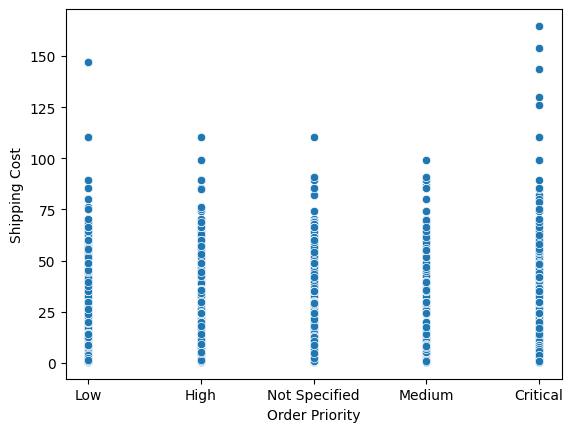

In [50]:
sns.scatterplot(data=df, x='Order Priority', y='Shipping Cost')


10. Which customers generate the most revenue and profit?


In [51]:
top_customers = df.groupby('Customer Name')[['Sales','Profit']].sum().sort_values(by='Sales',ascending = False).head(10)
top_customers

,Sales,Profit
Customer Name,,
Emily Phan,117124.44,34005.44
Deborah Brumfield,97433.14,31121.22
Roy Skaria,92542.15,1343.94
Sylvia Foulston,88875.76,5141.90
Grant Carroll,88417.00,27977.29
Alejandro Grove,83561.93,20588.92
Darren Budd,81577.34,1857.66
Julia Barnett,80044.45,-1956.09
John Lucas,79696.19,12725.08



11. What is the average shipping cost for each shipping mode?


In [52]:
average_shipping_cost = df.groupby('Ship Mode')['Shipping Cost'].mean()
average_shipping_cost

Ship Mode
Delivery Truck   45.35
Express Air       7.99
Regular Air       7.66
Name: Shipping Cost, dtype: float64

12. Does shipping mode affect the delivery time (difference between Order Date and Ship Date)?

In [53]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time(Days)'] =  (df['Ship Date'] - df['Order Date']).dt.days
shipping_analysis = df.groupby('Ship Mode')['Delivery Time(Days)'].mean().sort_values(ascending =False)
shipping_analysis

<ipython-input-53-beaf2910f194>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-53-beaf2910f194>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


Ship Mode
Delivery Truck   2.04
Regular Air      2.04
Express Air      2.00
Name: Delivery Time(Days), dtype: float64

(0.0, 300.0)

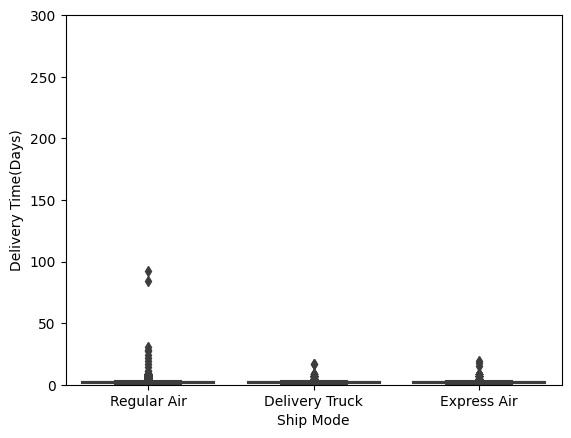

In [54]:
ax1 = sns.boxplot(data = df, x = 'Ship Mode', y='Delivery Time(Days)')
ax1.set_ylim(0,300)

13. Which provinces incur the highest average shipping costs?

In [55]:
highest_average_shipping_cost = df.groupby('Province')['Shipping Cost'].mean().sort_values(ascending =False)
highest_average_shipping_cost

Province
Prince Edward Island    14.08
Nova Scotia             13.97
Yukon                   13.78
Northwest Territories   13.75
Quebec                  13.50
Manitoba                13.18
Ontario                 12.86
Alberta                 12.85
Nunavut                 12.77
New Brunswick           12.53
British Columbia        11.96
Newfoundland            11.75
Saskachewan             11.41
Name: Shipping Cost, dtype: float64

14. How does shipping cost impact profit for different regions?

In [56]:
shipping_cost_analaysis = df.groupby('Region')[['Shipping Cost','Profit']].mean().sort_values(by='Shipping Cost', ascending =False)
shipping_cost_analaysis

,Shipping Cost,Profit
Region,,
Yukon,13.78,136.25
Northwest Territories,13.75,255.46
Quebec,13.50,179.80
Atlantic,13.39,221.26
Ontario,12.86,189.96
Nunavut,12.77,35.96
West,12.35,149.18
Prarie,12.23,188.25


Text(0, 0.5, 'Amount')

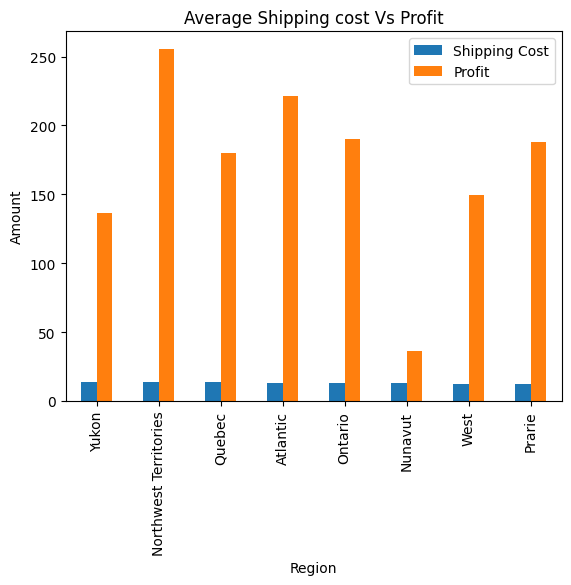

In [57]:
shipping_cost_analaysis.plot(kind = 'bar' )
plt.title('Average Shipping cost Vs Profit')
plt.ylabel('Amount')

In [58]:
### **Time-Based Analysis**
15. What are the monthly or yearly trends in sales and profit?
16. Are there specific times of the year (e.g., months, seasons) where sales spike?
17. Does the order priority distribution change over time?


Object `profit` not found.
Object `spike` not found.


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              8399 non-null   int64         
 1   Order Date            8399 non-null   datetime64[ns]
 2   Order Priority        8399 non-null   object        
 3   Order Quantity        8399 non-null   int64         
 4   Sales                 8399 non-null   float64       
 5   Discount              8399 non-null   float64       
 6   Ship Mode             8399 non-null   object        
 7   Profit                8399 non-null   float64       
 8   Unit Price            8399 non-null   float64       
 9   Shipping Cost         8399 non-null   float64       
 10  Customer Name         8399 non-null   object        
 11  Province              8399 non-null   object        
 12  Region                8399 non-null   object        
 13  Customer Segment  

In [60]:
df['Month'] = df['Order Date'].dt.month
df['Month_name'] = df['Order Date'].dt.strftime('%B')
df['Year'] = df['Order Date'].dt.year

In [61]:
yearly_trends = df.groupby('Year')[['Sales','Profit']].sum()
yearly_trends = round(yearly_trends,2)
yearly_trends

,Sales,Profit
Year,,
2009,4209139.46,434538.73
2010,3549680.80,363871.48
2011,3436816.70,381455.99
2012,3719963.86,341901.78


In [62]:
monthly_trends = df.groupby('Month')[['Sales','Profit']].sum().sort_index()
monthly_trends = round(monthly_trends,2)
monthly_trends

,Sales,Profit
Month,,
1,1444923.38,171520.75
2,1180083.78,102429.12
3,1273680.93,104799.33
4,1216483.44,123906.52
5,1160896.38,115628.69
6,1030858.51,118703.56
7,1141104.35,120965.31
8,1115015.33,74585.50
9,1337956.96,164352.69


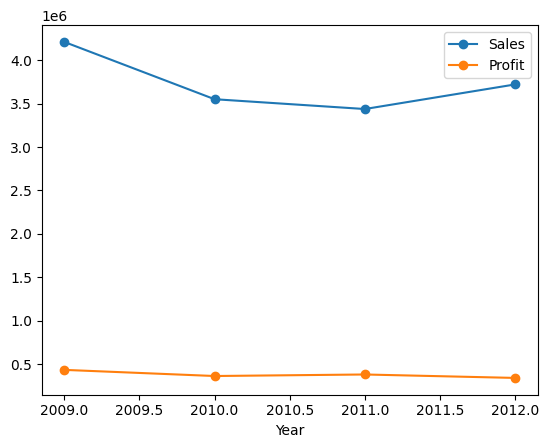

In [63]:
ax3 = yearly_trends.plot(kind = 'line', marker = 'o')

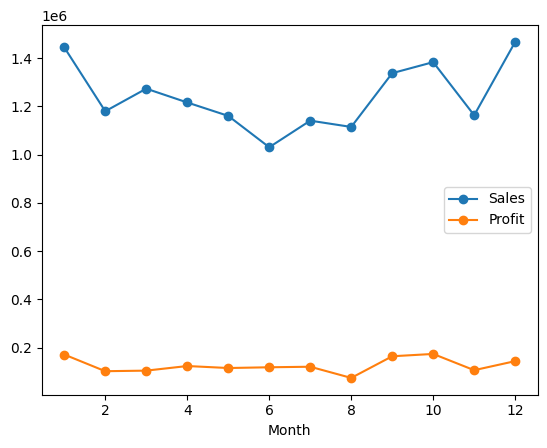

In [64]:
ax4 = monthly_trends.plot(kind='line', marker = 'o')

Does the order priority distribution change over time?

In [65]:
order_priority = df.groupby(['Year', 'Order Priority'])['Order ID'].count().unstack()
order_priority

Order Priority,Critical,High,Low,Medium,Not Specified
Year,,,,,
2009,443,417,420,428,445
2010,342,454,483,447,416
2011,412,449,385,369,387
2012,411,448,432,387,424


In [66]:
average_unit_prices =  df.groupby('Product Sub-Category')['Unit Price'].mean()
highest_unit_price = average_unit_prices.idxmax()
lowest_unit_price = average_unit_prices.idxmin()
highest_unit_price, lowest_unit_price

('Copiers and Fax', 'Rubber Bands')

In [67]:
relationship = df['Product Base Margin'].corr(df['Profit'])
relationship

-0.11485220070092583

In [68]:
discount = df.groupby(['Product Category','Product Sub-Category'])['Discount'].mean()
discount

Product Category  Product Sub-Category          
Furniture         Bookcases                        0.05
                  Chairs & Chairmats               0.05
                  Office Furnishings               0.05
                  Tables                           0.05
Office Supplies   Appliances                       0.05
                  Binders and Binder Accessories   0.05
                  Envelopes                        0.05
                  Labels                           0.05
                  Paper                            0.05
                  Pens & Art Supplies              0.05
                  Rubber Bands                     0.05
                  Scissors, Rulers and Trimmers    0.05
                  Storage & Organization           0.05
Technology        Computer Peripherals             0.05
                  Copiers and Fax                  0.05
                  Office Machines                  0.05
                  Telephones and Communication     0.05

In [69]:
frequently_ordered = df.groupby('Product Sub-Category')['Order ID'].count().sort_values(ascending = False)
frequently_ordered

Product Sub-Category
Paper                             1225
Binders and Binder Accessories     915
Telephones and Communication       883
Office Furnishings                 788
Computer Peripherals               758
Pens & Art Supplies                633
Storage & Organization             546
Appliances                         434
Chairs & Chairmats                 386
Tables                             361
Office Machines                    337
Labels                             288
Envelopes                          246
Bookcases                          189
Rubber Bands                       179
Scissors, Rulers and Trimmers      144
Copiers and Fax                     87
Name: Order ID, dtype: int64

23. Which region contributes the most to total sales and profit?

In [70]:
contribute= df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by = ['Sales','Profit'], ascending = False)
contribute_sales = contribute['Sales'].idxmax()
contribute_Profit = contribute['Profit'].idxmax()
print(f"most Contributed regions for total sales : {contribute_sales}")
print(f"most Contributed regions for total profit : {contribute_Profit}")

most Contributed regions for total sales : West
most Contributed regions for total profit : Ontario


Which provinces have the highest and lowest average order quantities?

In [71]:
provinces = df.groupby('Province')['Order Quantity'].mean().sort_values(ascending = False)
provinces_highest = provinces.idxmax()
provinces_lowest = provinces.idxmin()
print(f'{provinces_highest} province has the highest average order quanitites')
print(f'{provinces_lowest} province has the lowest average order quantities')

Prince Edward Island province has the highest average order quanitites
Newfoundland province has the lowest average order quantities


Predicting Sales using Linear Regression

In [72]:
df1 = df.copy()

In [73]:
Y = df1['Sales']

In [74]:
X = df1[['Order Quantity', 'Discount','Profit','Unit Price','Profit Margin']] 

In [75]:
X.shape ,  Y.shape

((8399, 5), (8399,))

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [78]:
X_train.shape, Y_train.shape

((6719, 5), (6719,))

In [79]:
X_test.shape, Y_test.shape

((1680, 5), (1680,))

In [80]:
model = linear_model.LinearRegression()

In [81]:
model.fit(X_train, Y_train)

LinearRegression()

In [82]:
Y_pred = model.predict(X_test)

In [83]:
Y_pred

array([ 872.11422848, 2303.83128879, 2974.99990312, ...,  536.14691349,
       3938.72346793,  541.52760349])

Text(0.5, 1.0, 'Actual Sales VS Predicted Sales')

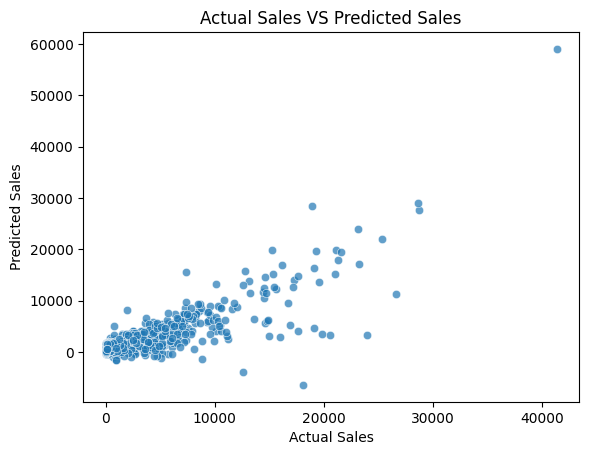

In [84]:
ax = sns.scatterplot(x = Y_test, y=Y_pred, alpha = 0.7)
ax.set_xlabel("Actual Sales")
ax.set_ylabel("Predicted Sales")
ax.set_title("Actual Sales VS Predicted Sales")